In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV

In [6]:
from sklearn.feature_selection import SelectKBest,chi2

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
bank=pd.read_csv("D://project/bank/bank_final/bank_DBSCAN_label.csv")

In [11]:
bank.head()

,Unnamed: 0,Average account balance,TN debtor transactions,TN creditor transactions,TN transactions,average debtor transaction,average creditor transaction,DBNCD,DFACD,Label_db
0,0,0.888613,2.823709e-11,7.496866e-10,7.779237e-10,0.327629,0.006724,7.214495e-10,-0.320905,0
1,1,0.819328,4.558327e-11,1.185624e-09,1.231207e-09,0.414097,0.017987,1.140041e-09,-0.396109,0
2,2,0.948651,2.276487e-12,2.069534e-13,2.483440e-12,0.237297,0.206953,-2.069534e-12,-0.030344,0
3,3,0.544428,2.606154e-10,5.940497e-10,8.546651e-10,0.623510,0.557165,3.334344e-10,-0.066345,1
4,4,0.726898,3.599195e-12,1.270304e-11,1.630223e-11,0.557522,0.226929,9.103845e-12,-0.330593,0


In [12]:
bank.drop("Unnamed: 0",axis=1, inplace=True)

In [13]:
bank.head()

,Average account balance,TN debtor transactions,TN creditor transactions,TN transactions,average debtor transaction,average creditor transaction,DBNCD,DFACD,Label_db
0,0.888613,2.823709e-11,7.496866e-10,7.779237e-10,0.327629,0.006724,7.214495e-10,-0.320905,0
1,0.819328,4.558327e-11,1.185624e-09,1.231207e-09,0.414097,0.017987,1.140041e-09,-0.396109,0
2,0.948651,2.276487e-12,2.069534e-13,2.483440e-12,0.237297,0.206953,-2.069534e-12,-0.030344,0
3,0.544428,2.606154e-10,5.940497e-10,8.546651e-10,0.623510,0.557165,3.334344e-10,-0.066345,1
4,0.726898,3.599195e-12,1.270304e-11,1.630223e-11,0.557522,0.226929,9.103845e-12,-0.330593,0


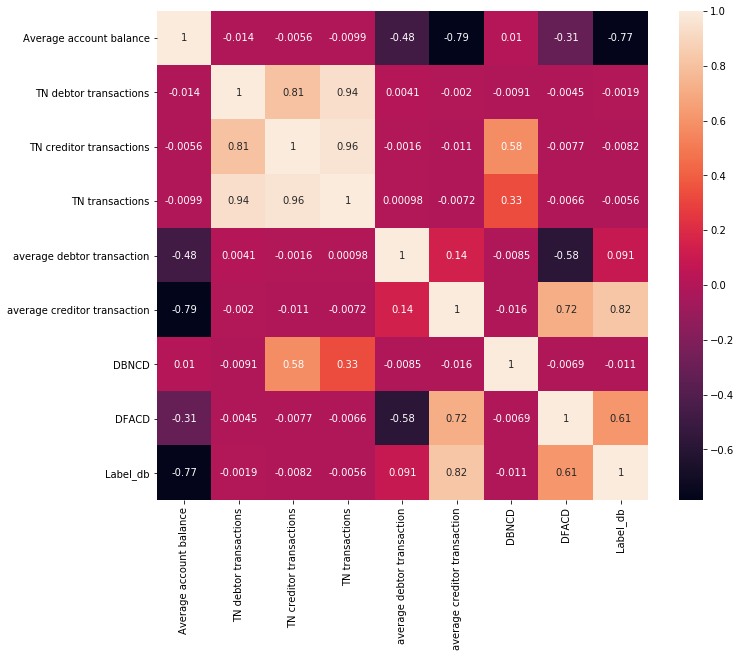

In [14]:
plt.figure(figsize=(11,9))
sb.heatmap(bank.corr(),annot=True)

In [15]:
#creat sub dataset for creat model with importans feature  and train test_split_model

In [16]:
x=bank.drop(["Label_db","DFACD","DBNCD"],axis=1) #drop DBNCD and DFACD be in khater k  :input dar chi2 baiad mosbat bashan
y=bank.Label_db

In [17]:
skb=SelectKBest(chi2,k=4)

In [18]:
x_new=skb.fit_transform(x,y)

In [19]:
skb.pvalues_

array([0.00000000e+000, 4.74920697e-001, 6.68146055e-001, 3.63134554e-001,
       2.71066689e-305, 0.00000000e+000])

In [20]:
skb.scores_

array([2.75491608e+03, 1.48921488e+00, 8.06496970e-01, 2.02596368e+00,
       1.40258252e+03, 1.50342912e+03])

In [21]:
x_new

array([[8.88613352e-01, 7.77923654e-10, 3.27629133e-01, 6.72376750e-03],
       [8.19327689e-01, 1.23120718e-09, 4.14096582e-01, 1.79872296e-02],
       [9.48651487e-01, 2.48344037e-12, 2.37297108e-01, 2.06953365e-01],
       ...,
       [0.00000000e+00, 4.71404520e-05, 7.07106780e-01, 7.07106780e-01],
       [0.00000000e+00, 2.82842712e-05, 7.07106781e-01, 7.07106781e-01],
       [0.00000000e+00, 1.17851129e-04, 7.07106774e-01, 7.07106774e-01]])

In [39]:
x=bank.drop(["Label_db","DBNCD"],axis=1)

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=33,test_size=0.3)
xnew_train,xnew_test,ynew_train,ynew_test=train_test_split(x_new,y,random_state=33,test_size=0.3)

In [41]:
##creat models [svm & knn & ANN & logistic regression & random forest & adabost]

In [42]:
#svc

In [43]:
##find best Parameters for svm
param_grids={"kernel":["linear","rbf"],
             "C":[5,10,15,30],
             "random_state":[42,33,0,303]   
}

In [44]:
#find best params for SVC with Gridsearch cv
grid=GridSearchCV(SVC(),param_grids)

In [45]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 15, 30], 'kernel': ['linear', 'rbf'],
                         'random_state': [42, 33, 0, 303]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
grid.best_estimator_

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
grid.best_score_

0.9988469052008544

In [48]:
grid.best_params_

{'C': 15, 'kernel': 'rbf', 'random_state': 42}

In [49]:
svc=SVC(kernel="rbf",C=30,probability=True)

In [50]:
svc.fit(xtrain,ytrain)
print("SVC","\n",'-'*40)
print("score train:: ",svc.score(xtrain,ytrain)," || score test::",svc.score(xtest,ytest))
ypred=svc.predict(xtest)
print("-"*40)
print(classification_report(ytest,ypred))
print("-"*40)
print(confusion_matrix(ytest,ypred))

SVC 
 ----------------------------------------
score train::  0.9992661704581193  || score test:: 0.9980435314257765
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       0.99      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

----------------------------------------
[[1268    6    0]
 [   0 1027    2]
 [   0    0 1786]]


In [51]:
grid.fit(xnew_train,ynew_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 15, 30], 'kernel': ['linear', 'rbf'],
                         'random_state': [42, 33, 0, 303]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
grid.best_params_
#hamon SVC 

{'C': 30, 'kernel': 'rbf', 'random_state': 42}

In [53]:
svc.fit(xnew_train,ynew_train)
print("SVC","\n",'-'*40)
print("score train:: ",svc.score(xnew_train,ynew_train)," || score test::",svc.score(xnew_test,ynew_test))
ynew_pred=svc.predict(xnew_test)
print("-"*40)
print(classification_report(ynew_test,ynew_pred))
print("-"*40)
print(confusion_matrix(ynew_test,ynew_pred))

SVC 
 ----------------------------------------
score train::  0.9990565048747249  || score test:: 0.9982880899975544
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

----------------------------------------
[[1268    5    1]
 [   0 1028    1]
 [   0    0 1786]]


In [54]:
#knn

In [55]:
knn_param={"n_neighbors":[3,4,5,6,7,8,9,15,20,30]
          ,"weights":['uniform',"distance"],
          }

grid=GridSearchCV(KNeighborsClassifier(),knn_param)

In [56]:
grid.fit(xtrain,ytrain)
grid.best_score_

0.997693590534267

In [57]:
grid.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [62]:
knn=KNeighborsClassifier(n_neighbors=30,weights="distance",metric="euclidean")

In [63]:
knn.fit(xtrain,ytrain)
print("train score: ",knn.score(xtrain,ytrain),"test score: ",knn.score(xtest,ytest))
print("*"*40)
ypred=knn.predict(xtest)
print(classification_report(ytest,ypred))
print("*"*40)
print(confusion_matrix(ytest,ypred))

train score:  1.0 test score:  0.9968207385668868
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      0.99      0.99      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

****************************************
[[1269    4    1]
 [   4 1022    3]
 [   0    1 1785]]


In [64]:
grid.fit(xnew_train,ynew_train) #xnew , ynew
grid.best_score_

0.997588768731332

In [65]:
grid.best_params_

{'n_neighbors': 30, 'weights': 'distance'}

In [66]:
knn.fit(xnew_train,ynew_train)
print("score train: ",knn.score(xnew_train,ynew_train),"score test: ",knn.score(xnew_test,ynew_test))
print("#"*40)
ypred=knn.predict(xnew_test)
print(classification_report(ynew_test,ypred))
print(confusion_matrix(ynew_test,ypred))

score train:  1.0 score test:  0.9973098557104426
########################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      0.99      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1270    2    2]
 [   3 1023    3]
 [   0    1 1785]]


In [67]:
#mlpclassifier

In [68]:
param_mlp={
    "hidden_layer_sizes":[(10,)],
    "activation":["tanh", "relu"]       
}

In [69]:
mlp=MLPClassifier((20,10),activation="logistic",random_state=42)

In [70]:
mlp.fit(xtrain,ytrain)


c:\users\javan\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [71]:
print("score train: ",mlp.score(xtrain,ytrain),"score test: ",mlp.score(xtest,ytest))
print("*"*40)
ypred=mlp.predict(xtest)

print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))


score train:  0.9987420064996331 score test:  0.9977989728539985
****************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1269    4    1]
 [   1 1025    3]
 [   0    0 1786]]


In [72]:
#RandomForestClassifier

In [73]:
rf_param={"n_estimators":[20,50,100],
          "criterion":["gini","entropy"],
           "max_depth":[5,10,20,100],
}

In [74]:
grid=GridSearchCV(RandomForestClassifier(random_state=42),rf_param)

In [75]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [76]:
grid.best_score_

0.9985323298583285

In [77]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [78]:
rfc=RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=20)

In [79]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
print("score train: ",rfc.score(xtrain,ytrain),"score test: ",rfc.score(xtest,ytest))
print("#"*20)
ypred=rfc.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))


score train:  1.0 score test:  0.9968207385668868
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      0.99      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    3    3]
 [   5 1023    1]
 [   1    0 1785]]


In [59]:
#The importance of features in determining the output of the model
rfc.feature_importances_ 

array([0.36635325, 0.00209225, 0.00424036, 0.00238128, 0.36212019,
       0.26281267])

In [60]:
rfc.fit(xnew_train,ynew_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
print("score train: ",rfc.score(xnew_train,ynew_train),"score test: ",rfc.score(xnew_test,ynew_test))
print("#"*20)
ypred=rfc.predict(xnew_test)
print(classification_report(ynew_test,ynew_pred))
print(confusion_matrix(ynew_test,ynew_pred))

score train:  1.0 score test:  0.9960870628515529
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    5    1]
 [   0 1028    1]
 [   0    0 1786]]


In [62]:
rfc.feature_importances_

array([0.38749306, 0.00088024, 0.34287247, 0.26875423])

In [63]:
#adabootclassifier

In [64]:
ada_param={"n_estimators":[20,25,30,50,100]
           
}

In [65]:
grid=GridSearchCV(AdaBoostClassifier(random_state=42),ada_param)

In [66]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [20, 25, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
grid.best_params_

{'n_estimators': 25}

In [68]:
grid.best_score_

0.9146671921498527

In [69]:
ada=AdaBoostClassifier(n_estimators=25,random_state=42)

In [70]:
ada.fit(xtrain,ytrain)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=42)

In [71]:
print("score train: ",ada.score(xtrain,ytrain),"score test: ",ada.score(xtest,ytest))
print("#"*20)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))


score train:  0.9379389873152322 score test:  0.9393494741990707
####################
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1274
           1       0.87      0.98      0.92      1029
           2       1.00      0.88      0.93      1786

    accuracy                           0.94      4089
   macro avg       0.93      0.95      0.94      4089
weighted avg       0.94      0.94      0.94      4089

[[1268    6    0]
 [  16 1009    4]
 [  73  149 1564]]


In [72]:
ada.feature_importances_ 

array([0.04, 0.  , 0.  , 0.  , 0.48, 0.48])

In [73]:
ada.fit(xnew_train,ynew_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=25, random_state=42)

In [74]:
print("score train: ",ada.score(xnew_train,ynew_train),"score test: ",ada.score(xnew_test,ynew_test))
print("#"*20)
ypred=ada.predict(xnew_test)
print(classification_report(ynew_test,ynew_pred))
print(confusion_matrix(ynew_test,ynew_pred))

score train:  0.9379389873152322 score test:  0.9393494741990707
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    5    1]
 [   0 1028    1]
 [   0    0 1786]]


In [75]:
ada.feature_importances_

array([0.04, 0.  , 0.48, 0.48])

In [76]:
#logistic Regression

In [77]:
logr=LogisticRegression(C=10)

In [78]:
logr.fit(xtrain,ytrain)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print("score train: ",logr.score(xtrain,ytrain),"score test: ",logr.score(xtest,ytest))
print("#"*20)
ypred=logr.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))


score train:  0.9988468392913303 score test:  0.9973098557104426
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       0.99      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1269    2    3]
 [   0 1027    2]
 [   0    4 1782]]


In [80]:
logr.fit(xnew_train,ynew_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
print("score train: ",logr.score(xnew_train,ynew_train),"score test: ",logr.score(xnew_test,ynew_test))
print("#"*20)
ypred=logr.predict(xnew_test)
print(classification_report(ynew_test,ynew_pred))
print(confusion_matrix(ynew_test,ynew_pred))

score train:  0.9988468392913303 score test:  0.9973098557104426
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    5    1]
 [   0 1028    1]
 [   0    0 1786]]


In [82]:
#bagging with knn , svm , logreg

In [88]:
bag_param={"base_estimator":[SVC(),KNeighborsClassifier(),LogisticRegression()],
           "n_estimators":[5,11,21,25,33],
           "random_state":[0,42,33]
    
    
    
}

In [91]:
grid=GridSearchCV(,bag_param)

In [92]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [SVC(C=1.0, break_ties=False,
                                                cache_size=200,
                                                c...
                                                               class_weight=None,
                                                               dual=False,
                                                               fit_intercept=True,
                                               

In [94]:
grid.best_params_

{'base_estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False), 'n_estimators': 33, 'random_state': 42}

In [97]:
grid.best_score_

0.9974840568621179

In [99]:
bag=BaggingClassifier(SVC(kernel="rbf",C=30,probability=True),n_estimators=33,random_state=42)

In [100]:
bag.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=SVC(C=30, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=True, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=33, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [101]:
print("score train: ",bag.score(xtrain,ytrain),"score test: ",bag.score(xtest,ytest))
print("#"*20)
ypred=bag.predict(xtest)
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))


score train:  0.9989516720830276 score test:  0.9977989728539985
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    5    1]
 [   0 1027    2]
 [   1    0 1785]]


In [102]:
bag.fit(xnew_train,ynew_train)
print("score train: ",bag.score(xnew_train,ynew_train),"score test: ",bag.score(xnew_test,ynew_test))
print("#"*20)
ypred=bag.predict(xnew_test)
print(classification_report(ynew_test,ypred))
print(confusion_matrix(ynew_test,ypred))


score train:  0.9988468392913303 score test:  0.9980435314257765
####################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1029
           2       1.00      1.00      1.00      1786

    accuracy                           1.00      4089
   macro avg       1.00      1.00      1.00      4089
weighted avg       1.00      1.00      1.00      4089

[[1268    5    1]
 [   0 1027    2]
 [   0    0 1786]]


## end 